In [1]:
import sys
sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm, entropy
from densne import run_densne

### Generate data over the 2D grid and plot

In [2]:
# Generate data over the 2D grid (Gaussian)
NUM_POINTS = 10000
t_G = np.random.normal(9, 3, NUM_POINTS)
X_G = np.zeros((NUM_POINTS, 2))
X_G[:, 0] = 0.04 * t_G * np.sin(t_G) + np.random.normal(0, 0.01, NUM_POINTS)
X_G[:, 1] = 0.04 * t_G * np.cos(t_G) + np.random.normal(0, 0.01, NUM_POINTS)

In [3]:
# Generate data over the 2D grid (uniform)
NUM_POINTS = 10000
t_U = np.random.uniform(3, 15, NUM_POINTS)
X_U = np.zeros((NUM_POINTS, 2))
X_U[:, 0] = 0.04 * t_U * np.sin(t_U) + np.random.normal(0, 0.01, NUM_POINTS)
X_U[:, 1] = 0.04 * t_U * np.cos(t_U) + np.random.normal(0, 0.01, NUM_POINTS)

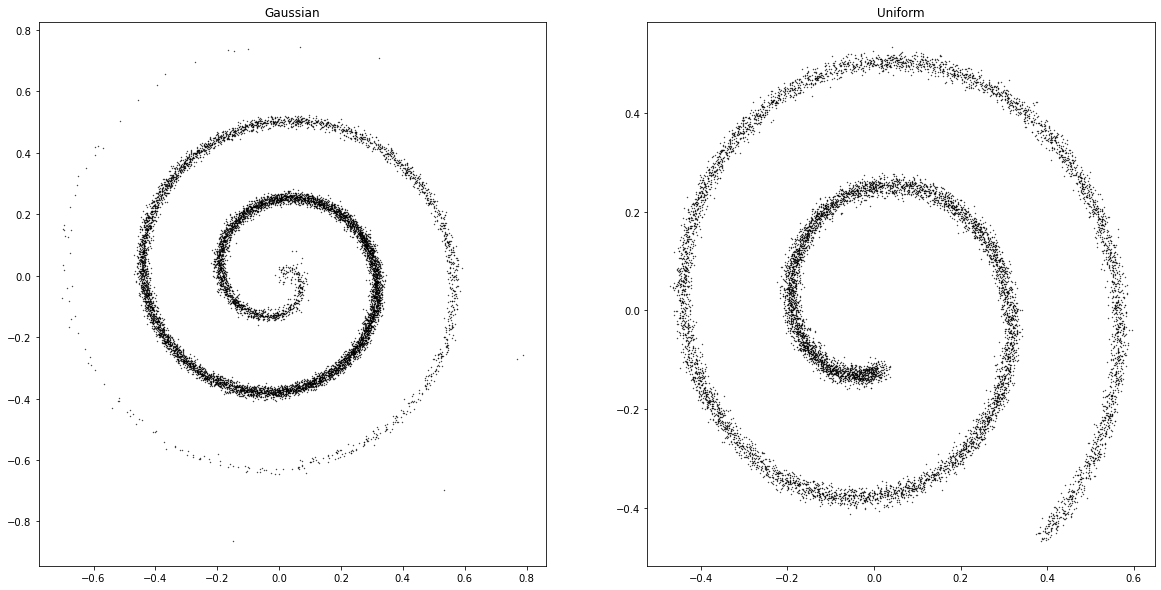

In [4]:
fig, ax = plt.subplots(1,2,figsize=[20,10])

ax[0].scatter(X_G[:, 0], X_G[:, 1], c='k', marker='.', s=0.5)
ax[0].set_title('Gaussian')

ax[1].scatter(X_U[:, 0], X_U[:, 1], c='k', marker='.', s=0.5)
ax[1].set_title('Uniform')

plt.show()

### Manifold Learning using densne

In [5]:
emb, ro, re = run_densne(X_G, no_dims=1, perplexity=3, verbose=False, initial_dims=X_G.shape[1],
                         dens_frac=0.3, use_pca=False, max_iter=1000, dens_lambda=0.2,
                         final_dens=True)

In [6]:
# Kernel density estimation for emb
params = {'bandwidth': np.logspace(-1, 3, 40)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(emb)
print("best bandwidth 1d: {0}".format(grid.best_estimator_.bandwidth))
kde = grid.best_estimator_

best bandwidth 1d: 8.886238162743403


In [20]:
# Plot the orginial distribution and kde
xplot = np.linspace(-10, 30, 1000).reshape(-1,1)
den_g = norm.pdf(xplot, 9 , 3)

xplot_l = np.linspace(-150, 150, 7500).reshape(-1,1)
den_kde = kde.score_samples(xplot_l)

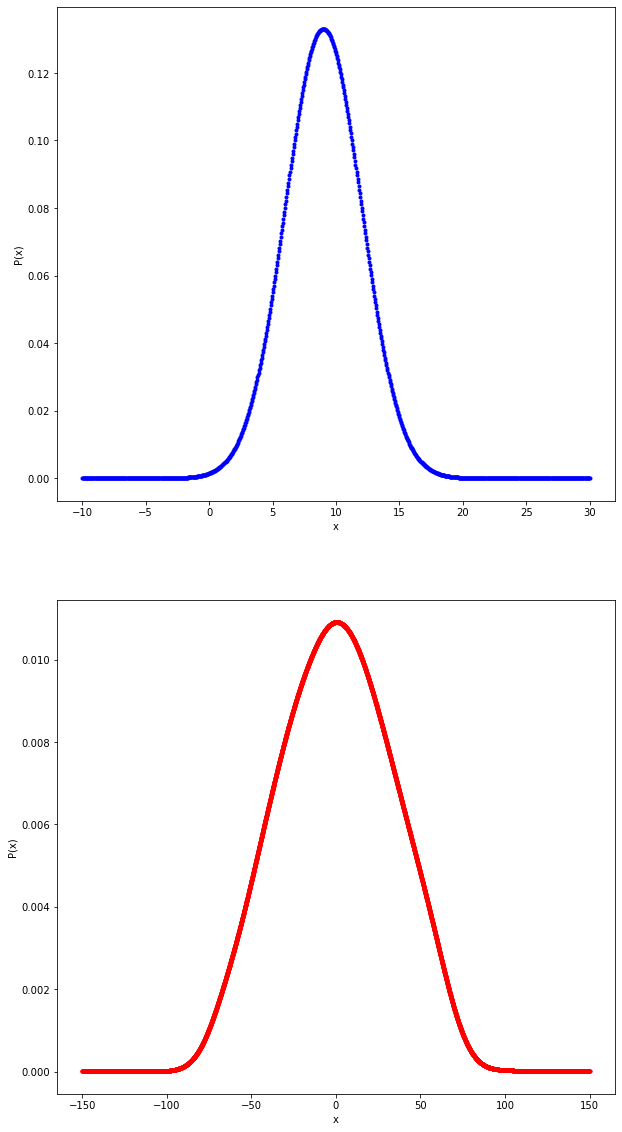

In [21]:
fig, ax = plt.subplots(2,1,figsize=[10,20])
ax[0].plot(xplot, den_g, marker='.', linewidth=0.001, c="b", label='Gaussian')
ax[1].plot(xplot_l, np.exp(den_kde), marker='.', linewidth=0.001, c="r", label='KDE')

ax[0].tick_params(labelsize = 10)
ax[1].tick_params(labelsize = 10)

ax[0].set_ylabel('P(x)')
ax[1].set_ylabel('P(x)')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

plt.show()

In [22]:
# compute KL divergence
KL  = entropy(norm.pdf(xplot_l,9,3).flatten(), np.exp(den_kde))
print("KL divergence: {0}".format(KL))

KL divergence: 2.0309836965671084


In [24]:
# compute ANLL
ANLL = -np.mean(np.log(np.exp(den_kde)[np.exp(den_kde) != 0]))
print("ANLL: {0}".format(ANLL))

ANLL: 7.812394163455892
